<a href="https://colab.research.google.com/github/Kambey-san/ASIM/blob/HW_lesson_07/KAA_ASIM_HW_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Прикладная статистика в медицине/ ДЗ
## Урок 7. Анализ выживаемости
Проведите анализ выживаемости пациентов с раком толстой кишки на приложенном к уроку датасете, используя код с занятия.

-Попробуйте сравнить кривые выживаемости с различными ковариатами.

-Задание выполняется на языке R и предоставляется в Google Colab или PDF/html рендере Quarto.

<a href='https://gbcdn.mrgcdn.ru/uploads/asset/6052003/attachment/356aace7953757f508ea19a8fdb8bf21.tsv'>colon_dataset.tsv</a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
install.packages("lubridate")
install.packages("tidyverse")
install.packages("survival")
install.packages("ggsurvfit")
install.packages("gtsummaryt")
install.packages("tidycmprsk")
install.packages("condSURV")
install.packages("survminer")
install.packages("readxl")
install.packages("readr")
install.packages("data.table")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘ggplot2’, ‘patchwork’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘gtsummaryt’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘V8’, ‘reactR’, ‘labelled’, ‘bigD’, ‘bitops’, ‘htmlwidgets’, ‘juicyjuice’, ‘markdown’, ‘reactable’, ‘broom.helpers’, ‘gt’, ‘cmprsk’, ‘gtsummary’, 

In [2]:
remotes::install_github("zabore/condsurv")

rlang      (1.1.3 -> 1.1.4) [CRAN]
cli        (3.6.2 -> 3.6.3) [CRAN]
munsell    (0.5.0 -> 0.5.1) [CRAN]
farver     (2.1.1 -> 2.1.2) [CRAN]
isoband    (0.2.6 -> 0.2.7) [CRAN]
gtable     (0.3.4 -> 0.3.5) [CRAN]
tidyselect (1.2.0 -> 1.2.1) [CRAN]


Installing 7 packages: rlang, cli, munsell, farver, isoband, gtable, tidyselect

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/Rtmpkv3Vdj/remotes3292730fdd5/zabore-condsurv-e618590/DESCRIPTION’ ... OK
* preparing ‘condsurv’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted ‘LazyData’ from DESCRIPTION
* building ‘condsurv_1.0.0.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
library(lubridate)
library(tidyverse)
library(survival)
library(ggsurvfit)
library(gtsummary)
library(tidycmprsk)
library(condSURV)
library(survminer)
library(readxl)
library(readr)
library(data.table)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr   1.1.4     ✔ readr   2.1.5
✔ forcats 1.0.0     ✔ stringr 1.5.1
✔ ggplot2 3.5.1     ✔ tibble  3.2.1
✔ purrr   1.0.2     ✔ tidyr   1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::%||%()   masks base::%||%()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘tidycmprsk’


The following object is masked from ‘package:gtsummary’:

    trial


Loading required package: ggpubr


Attaching package: ‘survminer’


The following object is masked from ‘package:survival’:

    myeloma



Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, fir

In [4]:
df <- read_tsv("/content/drive/MyDrive/Data_since_in_Healthcare/ASIM/HW_07/colon_dataset.tsv")
df

Rows: 1858 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (1): rx
dbl (15): id, study, sex, age, obstruct, perfor, adhere, nodes, status, diff...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


id,study,rx,sex,age,obstruct,perfor,adhere,nodes,status,differ,extent,surg,node4,time,etype
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Lev+5FU,1,43,0,0,0,5,1,2,3,0,1,1521,2
1,1,Lev+5FU,1,43,0,0,0,5,1,2,3,0,1,968,1
2,1,Lev+5FU,1,63,0,0,0,1,0,2,3,0,0,3087,2
2,1,Lev+5FU,1,63,0,0,0,1,0,2,3,0,0,3087,1
3,1,Obs,0,71,0,0,1,7,1,2,2,0,1,963,2
3,1,Obs,0,71,0,0,1,7,1,2,2,0,1,542,1
4,1,Lev+5FU,0,66,1,0,0,6,1,2,3,1,1,293,2
4,1,Lev+5FU,0,66,1,0,0,6,1,2,3,1,1,245,1
5,1,Obs,1,69,0,0,0,22,1,2,3,1,1,659,2


In [5]:
# recoding status to conventional
df <-
  df %>%
  as_tibble() %>%
  mutate(status = recode(status, `1` = 0, `2` = 1))

In [6]:
df # check again

id,study,rx,sex,age,obstruct,perfor,adhere,nodes,status,differ,extent,surg,node4,time,etype
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Lev+5FU,1,43,0,0,0,5,0,2,3,0,1,1521,2
1,1,Lev+5FU,1,43,0,0,0,5,0,2,3,0,1,968,1
2,1,Lev+5FU,1,63,0,0,0,1,0,2,3,0,0,3087,2
2,1,Lev+5FU,1,63,0,0,0,1,0,2,3,0,0,3087,1
3,1,Obs,0,71,0,0,1,7,0,2,2,0,1,963,2
3,1,Obs,0,71,0,0,1,7,0,2,2,0,1,542,1
4,1,Lev+5FU,0,66,1,0,0,6,0,2,3,1,1,293,2
4,1,Lev+5FU,0,66,1,0,0,6,0,2,3,1,1,245,1
5,1,Obs,1,69,0,0,0,22,0,2,3,1,1,659,2


In [7]:
colon_df <- df %>% select(time, status)

In [8]:
colon_df %>%
  tbl_summary(statistic = status ~ "{n} / {N}") %>%
  add_stat_label() %>%
  bold_labels()

<div id="lihqvfxvpx" style="padding-left:0px;padding-right:0px;padding-top:10px;padding-bottom:10px;overflow-x:auto;overflow-y:auto;width:auto;height:auto;">
  <style>#lihqvfxvpx table {
  font-family: system-ui, 'Segoe UI', Roboto, Helvetica, Arial, sans-serif, 'Apple Color Emoji', 'Segoe UI Emoji', 'Segoe UI Symbol', 'Noto Color Emoji';
  -webkit-font-smoothing: antialiased;
  -moz-osx-font-smoothing: grayscale;
}

#lihqvfxvpx thead, #lihqvfxvpx tbody, #lihqvfxvpx tfoot, #lihqvfxvpx tr, #lihqvfxvpx td, #lihqvfxvpx th {
  border-style: none;
}

#lihqvfxvpx p {
  margin: 0;
  padding: 0;
}

#lihqvfxvpx .gt_table {
  display: table;
  border-collapse: collapse;
  line-height: normal;
  margin-left: auto;
  margin-right: auto;
  color: #333333;
  font-size: 16px;
  font-weight: normal;
  font-style: normal;
  background-color: #FFFFFF;
  width: auto;
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #A8A8A8;
  border-right-style: none;
  border-right-width: 2px;
  b

<div id="lihqvfxvpx" style="padding-left:0px;padding-right:0px;padding-top:10px;padding-bottom:10px;overflow-x:auto;overflow-y:auto;width:auto;height:auto;">
  <style>#lihqvfxvpx table {
  font-family: system-ui, 'Segoe UI', Roboto, Helvetica, Arial, sans-serif, 'Apple Color Emoji', 'Segoe UI Emoji', 'Segoe UI Symbol', 'Noto Color Emoji';
  -webkit-font-smoothing: antialiased;
  -moz-osx-font-smoothing: grayscale;
}

#lihqvfxvpx thead, #lihqvfxvpx tbody, #lihqvfxvpx tfoot, #lihqvfxvpx tr, #lihqvfxvpx td, #lihqvfxvpx th {
  border-style: none;
}

#lihqvfxvpx p {
  margin: 0;
  padding: 0;
}

#lihqvfxvpx .gt_table {
  display: table;
  border-collapse: collapse;
  line-height: normal;
  margin-left: auto;
  margin-right: auto;
  color: #333333;
  font-size: 16px;
  font-weight: normal;
  font-style: normal;
  background-color: #FFFFFF;
  width: auto;
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #A8A8A8;
  border-right-style: none;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #A8A8A8;
  border-left-style: none;
  border-left-width: 2px;
  border-left-color: #D3D3D3;
}

#lihqvfxvpx .gt_caption {
  padding-top: 4px;
  padding-bottom: 4px;
}

#lihqvfxvpx .gt_title {
  color: #333333;
  font-size: 125%;
  font-weight: initial;
  padding-top: 4px;
  padding-bottom: 4px;
  padding-left: 5px;
  padding-right: 5px;
  border-bottom-color: #FFFFFF;
  border-bottom-width: 0;
}

#lihqvfxvpx .gt_subtitle {
  color: #333333;
  font-size: 85%;
  font-weight: initial;
  padding-top: 3px;
  padding-bottom: 5px;
  padding-left: 5px;
  padding-right: 5px;
  border-top-color: #FFFFFF;
  border-top-width: 0;
}

#lihqvfxvpx .gt_heading {
  background-color: #FFFFFF;
  text-align: center;
  border-bottom-color: #FFFFFF;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
}

#lihqvfxvpx .gt_bottom_border {
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
}

#lihqvfxvpx .gt_col_headings {
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
}

#lihqvfxvpx .gt_col_heading {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: normal;
  text-transform: inherit;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
  vertical-align: bottom;
  padding-top: 5px;
  padding-bottom: 6px;
  padding-left: 5px;
  padding-right: 5px;
  overflow-x: hidden;
}

#lihqvfxvpx .gt_column_spanner_outer {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: normal;
  text-transform: inherit;
  padding-top: 0;
  padding-bottom: 0;
  padding-left: 4px;
  padding-right: 4px;
}

#lihqvfxvpx .gt_column_spanner_outer:first-child {
  padding-left: 0;
}

#lihqvfxvpx .gt_column_spanner_outer:last-child {
  padding-right: 0;
}

#lihqvfxvpx .gt_column_spanner {
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  vertical-align: bottom;
  padding-top: 5px;
  padding-bottom: 5px;
  overflow-x: hidden;
  display: inline-block;
  width: 100%;
}

#lihqvfxvpx .gt_spanner_row {
  border-bottom-style: hidden;
}

#lihqvfxvpx .gt_group_heading {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  text-transform: inherit;
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
  vertical-align: middle;
  text-align: left;
}

#lihqvfxvpx .gt_empty_group_heading {
  padding: 0.5px;
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  vertical-align: middle;
}

#lihqvfxvpx .gt_from_md > :first-child {
  margin-top: 0;
}

#lihqvfxvpx .gt_from_md > :last-child {
  margin-bottom: 0;
}

#lihqvfxvpx .gt_row {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  margin: 10px;
  border-top-style: solid;
  border-top-width: 1px;
  border-top-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
  vertical-align: middle;
  overflow-x: hidden;
}

#lihqvfxvpx .gt_stub {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  text-transform: inherit;
  border-right-style: solid;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
  padding-left: 5px;
  padding-right: 5px;
}

#lihqvfxvpx .gt_stub_row_group {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  text-transform: inherit;
  border-right-style: solid;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
  padding-left: 5px;
  padding-right: 5px;
  vertical-align: top;
}

#lihqvfxvpx .gt_row_group_first td {
  border-top-width: 2px;
}

#lihqvfxvpx .gt_row_group_first th {
  border-top-width: 2px;
}

#lihqvfxvpx .gt_summary_row {
  color: #333333;
  background-color: #FFFFFF;
  text-transform: inherit;
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
}

#lihqvfxvpx .gt_first_summary_row {
  border-top-style: solid;
  border-top-color: #D3D3D3;
}

#lihqvfxvpx .gt_first_summary_row.thick {
  border-top-width: 2px;
}

#lihqvfxvpx .gt_last_summary_row {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
}

#lihqvfxvpx .gt_grand_summary_row {
  color: #333333;
  background-color: #FFFFFF;
  text-transform: inherit;
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
}

#lihqvfxvpx .gt_first_grand_summary_row {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  border-top-style: double;
  border-top-width: 6px;
  border-top-color: #D3D3D3;
}

#lihqvfxvpx .gt_last_grand_summary_row_top {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  border-bottom-style: double;
  border-bottom-width: 6px;
  border-bottom-color: #D3D3D3;
}

#lihqvfxvpx .gt_striped {
  background-color: rgba(128, 128, 128, 0.05);
}

#lihqvfxvpx .gt_table_body {
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
}

#lihqvfxvpx .gt_footnotes {
  color: #333333;
  background-color: #FFFFFF;
  border-bottom-style: none;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 2px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
}

#lihqvfxvpx .gt_footnote {
  margin: 0px;
  font-size: 90%;
  padding-top: 4px;
  padding-bottom: 4px;
  padding-left: 5px;
  padding-right: 5px;
}

#lihqvfxvpx .gt_sourcenotes {
  color: #333333;
  background-color: #FFFFFF;
  border-bottom-style: none;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 2px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
}

#lihqvfxvpx .gt_sourcenote {
  font-size: 90%;
  padding-top: 4px;
  padding-bottom: 4px;
  padding-left: 5px;
  padding-right: 5px;
}

#lihqvfxvpx .gt_left {
  text-align: left;
}

#lihqvfxvpx .gt_center {
  text-align: center;
}

#lihqvfxvpx .gt_right {
  text-align: right;
  font-variant-numeric: tabular-nums;
}

#lihqvfxvpx .gt_font_normal {
  font-weight: normal;
}

#lihqvfxvpx .gt_font_bold {
  font-weight: bold;
}

#lihqvfxvpx .gt_font_italic {
  font-style: italic;
}

#lihqvfxvpx .gt_super {
  font-size: 65%;
}

#lihqvfxvpx .gt_footnote_marks {
  font-size: 75%;
  vertical-align: 0.4em;
  position: initial;
}

#lihqvfxvpx .gt_asterisk {
  font-size: 100%;
  vertical-align: 0;
}

#lihqvfxvpx .gt_indent_1 {
  text-indent: 5px;
}

#lihqvfxvpx .gt_indent_2 {
  text-indent: 10px;
}

#lihqvfxvpx .gt_indent_3 {
  text-indent: 15px;
}

#lihqvfxvpx .gt_indent_4 {
  text-indent: 20px;
}

#lihqvfxvpx .gt_indent_5 {
  text-indent: 25px;
}
</style>
  <table class="gt_table" data-quarto-disable-processing="false" data-quarto-bootstrap="false">
  <thead>
    <tr class="gt_col_headings">
      <th class="gt_col_heading gt_columns_bottom_border gt_left" rowspan="1" colspan="1" scope="col" id="&lt;strong&gt;Characteristic&lt;/strong&gt;"><strong>Characteristic</strong></th>
      <th class="gt_col_heading gt_columns_bottom_border gt_center" rowspan="1" colspan="1" scope="col" id="&lt;strong&gt;N = 1,858&lt;/strong&gt;"><strong>N = 1,858</strong></th>
    </tr>
  </thead>
  <tbody class="gt_table_body">
    <tr><td headers="label" class="gt_row gt_left" style="font-weight: bold;">time, Median (IQR)</td>
<td headers="stat_0" class="gt_row gt_center">1,855 (566, 2,331)</td></tr>
    <tr><td headers="label" class="gt_row gt_left" style="font-weight: bold;">status, n / N</td>
<td headers="stat_0" class="gt_row gt_center">0 / 1,858</td></tr>
  </tbody>
  
  
</table>
</div>

In [9]:
# Creating survival objects and curves ------------------------------------

Surv(df$time, df$status)[1:10]

 [1] 1521+  968+ 3087+ 3087+  963+  542+  293+  245+  659+  523+

In [10]:
s1 <- survfit(Surv(time, status) ~ 1, data = df)
str(s1)

List of 17
 $ n        : int 1858
 $ time     : num [1:1067] 8 9 19 20 23 24 28 34 35 36 ...
 $ n.risk   : num [1:1067] 1858 1857 1856 1855 1854 ...
 $ n.event  : num [1:1067] 0 0 0 0 0 0 0 0 0 0 ...
 $ n.censor : num [1:1067] 1 1 1 1 2 2 1 1 1 1 ...
 $ surv     : num [1:1067] 1 1 1 1 1 1 1 1 1 1 ...
 $ std.err  : num [1:1067] 0 0 0 0 0 0 0 0 0 0 ...
 $ cumhaz   : num [1:1067] 0 0 0 0 0 0 0 0 0 0 ...
 $ std.chaz : num [1:1067] 0 0 0 0 0 0 0 0 0 0 ...
 $ type     : chr "right"
 $ logse    : logi TRUE
 $ conf.int : num 0.95
 $ conf.type: chr "log"
 $ lower    : num [1:1067] 1 1 1 1 1 1 1 1 1 1 ...
 $ upper    : num [1:1067] 1 1 1 1 1 1 1 1 1 1 ...
 $ t0       : num 0
 $ call     : language survfit(formula = Surv(time, status) ~ 1, data = df)
 - attr(*, "class")= chr "survfit"


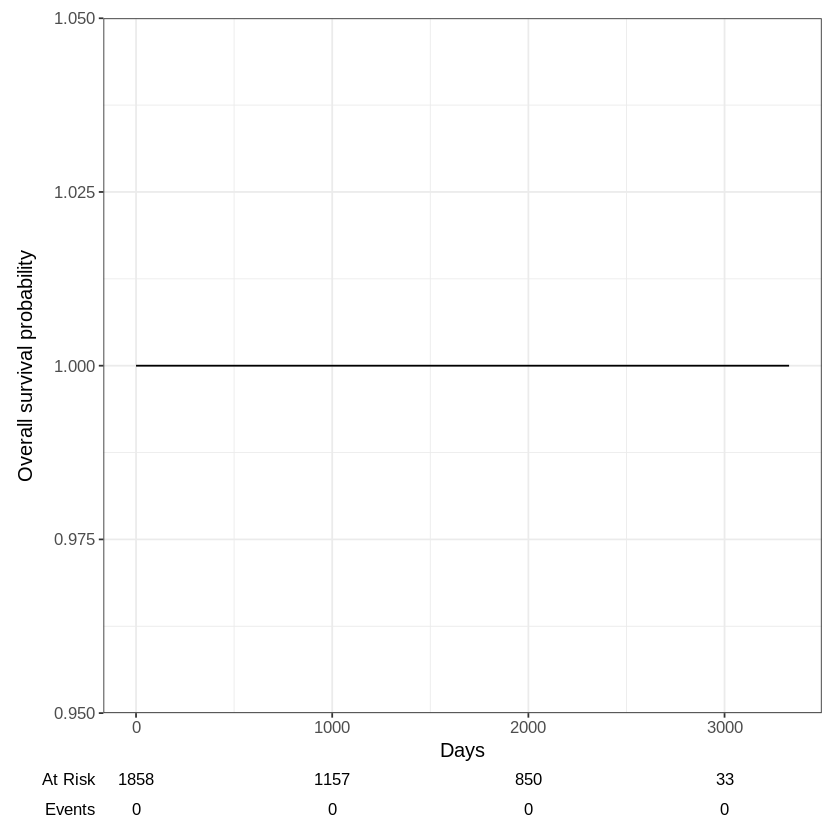

In [11]:
# Kaplan-Meier plots ------------------------------------------------------

survfit2(Surv(time, status) ~ 1, data = df) %>%
  ggsurvfit() +
  labs(
    x = "Days",
    y = "Overall survival probability"
  ) +
  add_confidence_interval() +
  add_risktable()

In [12]:
# estimate x-year survival

summary(s1, times = 365.25)

Call: survfit(formula = Surv(time, status) ~ 1, data = df)

 time n.risk n.event survival std.err lower 95% CI upper 95% CI
  365   1550       0        1       0            1            1

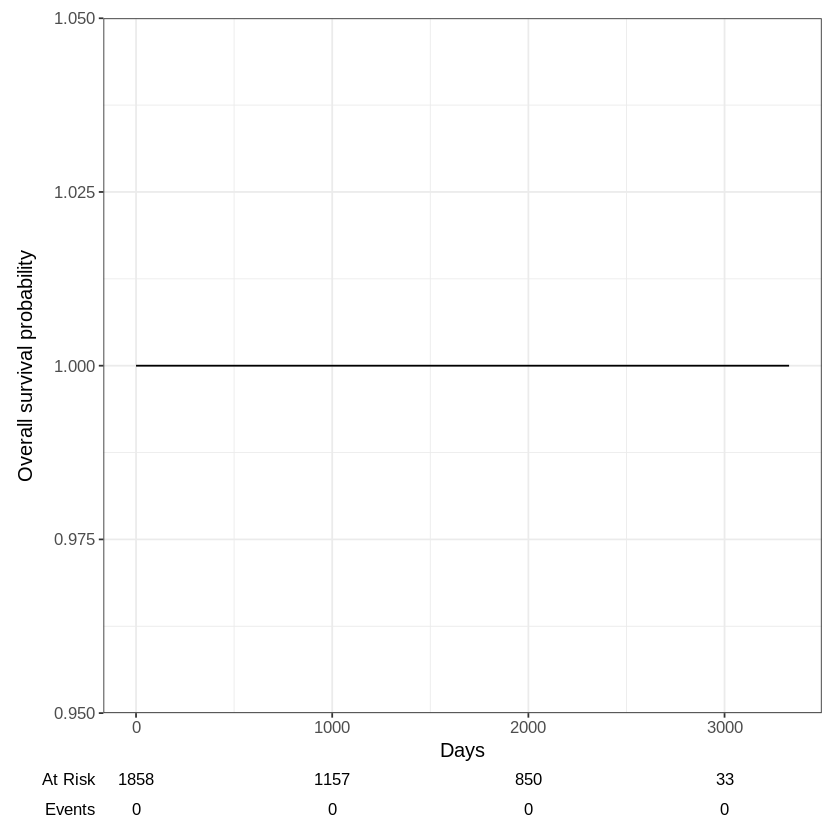

In [13]:
s1 %>%
  ggsurvfit() +
  labs(
    x = "Days",
    y = "Overall survival probability"
  ) +
  add_confidence_interval() +
  add_risktable()

In [14]:
s1 %>%
  tbl_survfit(
    times = 365.25,
    label_header = "**1-year survival (95% CI)**")

<div id="mpecyzqphi" style="padding-left:0px;padding-right:0px;padding-top:10px;padding-bottom:10px;overflow-x:auto;overflow-y:auto;width:auto;height:auto;">
  <style>#mpecyzqphi table {
  font-family: system-ui, 'Segoe UI', Roboto, Helvetica, Arial, sans-serif, 'Apple Color Emoji', 'Segoe UI Emoji', 'Segoe UI Symbol', 'Noto Color Emoji';
  -webkit-font-smoothing: antialiased;
  -moz-osx-font-smoothing: grayscale;
}

#mpecyzqphi thead, #mpecyzqphi tbody, #mpecyzqphi tfoot, #mpecyzqphi tr, #mpecyzqphi td, #mpecyzqphi th {
  border-style: none;
}

#mpecyzqphi p {
  margin: 0;
  padding: 0;
}

#mpecyzqphi .gt_table {
  display: table;
  border-collapse: collapse;
  line-height: normal;
  margin-left: auto;
  margin-right: auto;
  color: #333333;
  font-size: 16px;
  font-weight: normal;
  font-style: normal;
  background-color: #FFFFFF;
  width: auto;
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #A8A8A8;
  border-right-style: none;
  border-right-width: 2px;
  b

<div id="mpecyzqphi" style="padding-left:0px;padding-right:0px;padding-top:10px;padding-bottom:10px;overflow-x:auto;overflow-y:auto;width:auto;height:auto;">
  <style>#mpecyzqphi table {
  font-family: system-ui, 'Segoe UI', Roboto, Helvetica, Arial, sans-serif, 'Apple Color Emoji', 'Segoe UI Emoji', 'Segoe UI Symbol', 'Noto Color Emoji';
  -webkit-font-smoothing: antialiased;
  -moz-osx-font-smoothing: grayscale;
}

#mpecyzqphi thead, #mpecyzqphi tbody, #mpecyzqphi tfoot, #mpecyzqphi tr, #mpecyzqphi td, #mpecyzqphi th {
  border-style: none;
}

#mpecyzqphi p {
  margin: 0;
  padding: 0;
}

#mpecyzqphi .gt_table {
  display: table;
  border-collapse: collapse;
  line-height: normal;
  margin-left: auto;
  margin-right: auto;
  color: #333333;
  font-size: 16px;
  font-weight: normal;
  font-style: normal;
  background-color: #FFFFFF;
  width: auto;
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #A8A8A8;
  border-right-style: none;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #A8A8A8;
  border-left-style: none;
  border-left-width: 2px;
  border-left-color: #D3D3D3;
}

#mpecyzqphi .gt_caption {
  padding-top: 4px;
  padding-bottom: 4px;
}

#mpecyzqphi .gt_title {
  color: #333333;
  font-size: 125%;
  font-weight: initial;
  padding-top: 4px;
  padding-bottom: 4px;
  padding-left: 5px;
  padding-right: 5px;
  border-bottom-color: #FFFFFF;
  border-bottom-width: 0;
}

#mpecyzqphi .gt_subtitle {
  color: #333333;
  font-size: 85%;
  font-weight: initial;
  padding-top: 3px;
  padding-bottom: 5px;
  padding-left: 5px;
  padding-right: 5px;
  border-top-color: #FFFFFF;
  border-top-width: 0;
}

#mpecyzqphi .gt_heading {
  background-color: #FFFFFF;
  text-align: center;
  border-bottom-color: #FFFFFF;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
}

#mpecyzqphi .gt_bottom_border {
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
}

#mpecyzqphi .gt_col_headings {
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
}

#mpecyzqphi .gt_col_heading {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: normal;
  text-transform: inherit;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
  vertical-align: bottom;
  padding-top: 5px;
  padding-bottom: 6px;
  padding-left: 5px;
  padding-right: 5px;
  overflow-x: hidden;
}

#mpecyzqphi .gt_column_spanner_outer {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: normal;
  text-transform: inherit;
  padding-top: 0;
  padding-bottom: 0;
  padding-left: 4px;
  padding-right: 4px;
}

#mpecyzqphi .gt_column_spanner_outer:first-child {
  padding-left: 0;
}

#mpecyzqphi .gt_column_spanner_outer:last-child {
  padding-right: 0;
}

#mpecyzqphi .gt_column_spanner {
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  vertical-align: bottom;
  padding-top: 5px;
  padding-bottom: 5px;
  overflow-x: hidden;
  display: inline-block;
  width: 100%;
}

#mpecyzqphi .gt_spanner_row {
  border-bottom-style: hidden;
}

#mpecyzqphi .gt_group_heading {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  text-transform: inherit;
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
  vertical-align: middle;
  text-align: left;
}

#mpecyzqphi .gt_empty_group_heading {
  padding: 0.5px;
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  vertical-align: middle;
}

#mpecyzqphi .gt_from_md > :first-child {
  margin-top: 0;
}

#mpecyzqphi .gt_from_md > :last-child {
  margin-bottom: 0;
}

#mpecyzqphi .gt_row {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  margin: 10px;
  border-top-style: solid;
  border-top-width: 1px;
  border-top-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
  vertical-align: middle;
  overflow-x: hidden;
}

#mpecyzqphi .gt_stub {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  text-transform: inherit;
  border-right-style: solid;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
  padding-left: 5px;
  padding-right: 5px;
}

#mpecyzqphi .gt_stub_row_group {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  text-transform: inherit;
  border-right-style: solid;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
  padding-left: 5px;
  padding-right: 5px;
  vertical-align: top;
}

#mpecyzqphi .gt_row_group_first td {
  border-top-width: 2px;
}

#mpecyzqphi .gt_row_group_first th {
  border-top-width: 2px;
}

#mpecyzqphi .gt_summary_row {
  color: #333333;
  background-color: #FFFFFF;
  text-transform: inherit;
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
}

#mpecyzqphi .gt_first_summary_row {
  border-top-style: solid;
  border-top-color: #D3D3D3;
}

#mpecyzqphi .gt_first_summary_row.thick {
  border-top-width: 2px;
}

#mpecyzqphi .gt_last_summary_row {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
}

#mpecyzqphi .gt_grand_summary_row {
  color: #333333;
  background-color: #FFFFFF;
  text-transform: inherit;
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
}

#mpecyzqphi .gt_first_grand_summary_row {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  border-top-style: double;
  border-top-width: 6px;
  border-top-color: #D3D3D3;
}

#mpecyzqphi .gt_last_grand_summary_row_top {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  border-bottom-style: double;
  border-bottom-width: 6px;
  border-bottom-color: #D3D3D3;
}

#mpecyzqphi .gt_striped {
  background-color: rgba(128, 128, 128, 0.05);
}

#mpecyzqphi .gt_table_body {
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
}

#mpecyzqphi .gt_footnotes {
  color: #333333;
  background-color: #FFFFFF;
  border-bottom-style: none;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 2px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
}

#mpecyzqphi .gt_footnote {
  margin: 0px;
  font-size: 90%;
  padding-top: 4px;
  padding-bottom: 4px;
  padding-left: 5px;
  padding-right: 5px;
}

#mpecyzqphi .gt_sourcenotes {
  color: #333333;
  background-color: #FFFFFF;
  border-bottom-style: none;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 2px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
}

#mpecyzqphi .gt_sourcenote {
  font-size: 90%;
  padding-top: 4px;
  padding-bottom: 4px;
  padding-left: 5px;
  padding-right: 5px;
}

#mpecyzqphi .gt_left {
  text-align: left;
}

#mpecyzqphi .gt_center {
  text-align: center;
}

#mpecyzqphi .gt_right {
  text-align: right;
  font-variant-numeric: tabular-nums;
}

#mpecyzqphi .gt_font_normal {
  font-weight: normal;
}

#mpecyzqphi .gt_font_bold {
  font-weight: bold;
}

#mpecyzqphi .gt_font_italic {
  font-style: italic;
}

#mpecyzqphi .gt_super {
  font-size: 65%;
}

#mpecyzqphi .gt_footnote_marks {
  font-size: 75%;
  vertical-align: 0.4em;
  position: initial;
}

#mpecyzqphi .gt_asterisk {
  font-size: 100%;
  vertical-align: 0;
}

#mpecyzqphi .gt_indent_1 {
  text-indent: 5px;
}

#mpecyzqphi .gt_indent_2 {
  text-indent: 10px;
}

#mpecyzqphi .gt_indent_3 {
  text-indent: 15px;
}

#mpecyzqphi .gt_indent_4 {
  text-indent: 20px;
}

#mpecyzqphi .gt_indent_5 {
  text-indent: 25px;
}
</style>
  <table class="gt_table" data-quarto-disable-processing="false" data-quarto-bootstrap="false">
  <thead>
    <tr class="gt_col_headings">
      <th class="gt_col_heading gt_columns_bottom_border gt_left" rowspan="1" colspan="1" scope="col" id="&lt;strong&gt;Characteristic&lt;/strong&gt;"><strong>Characteristic</strong></th>
      <th class="gt_col_heading gt_columns_bottom_border gt_center" rowspan="1" colspan="1" scope="col" id="&lt;strong&gt;1-year survival (95% CI)&lt;/strong&gt;"><strong>1-year survival (95% CI)</strong></th>
    </tr>
  </thead>
  <tbody class="gt_table_body">
    <tr><td headers="label" class="gt_row gt_left">Overall</td>
<td headers="stat_1" class="gt_row gt_center">100% (100%, 100%)</td></tr>
  </tbody>
  
  
</table>
</div>

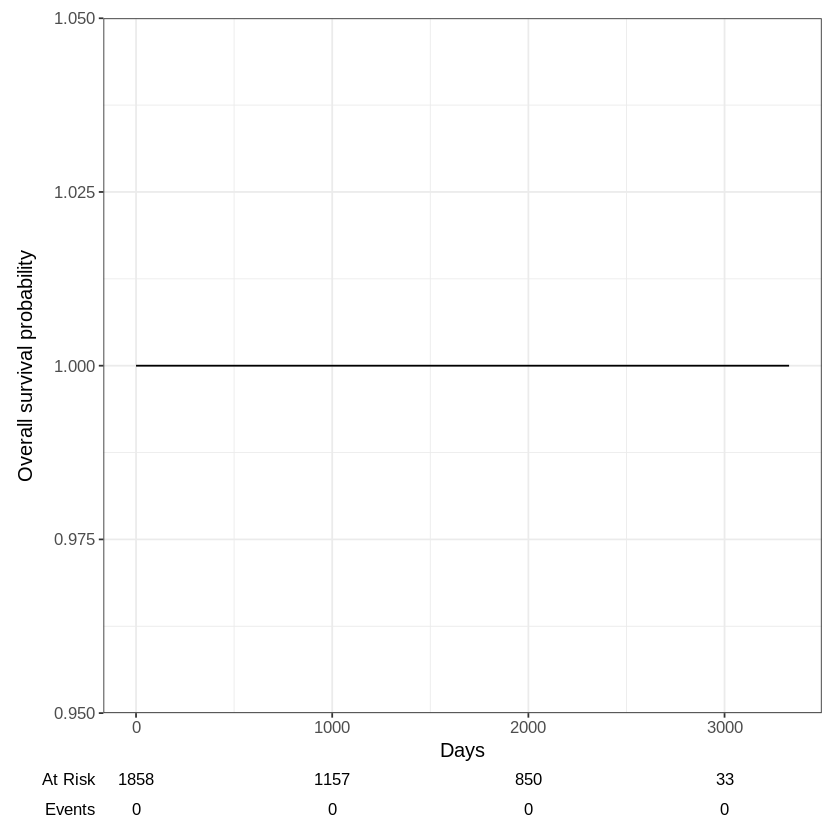

In [15]:
# median survival time
s1 %>%
  ggsurvfit() +
  labs(
    x = "Days",
    y = "Overall survival probability"
  ) +
  add_confidence_interval() +
  add_risktable()

In [16]:
df %>%
  filter(status == 1) %>%
  summarize(median_surv = median(time))

median_surv
<dbl>
NA


In [17]:
s1 %>%
  tbl_survfit(
    probs = 0.5,
    label_header = "**Median survival (95% CI)**")

<div id="txrwbljuvl" style="padding-left:0px;padding-right:0px;padding-top:10px;padding-bottom:10px;overflow-x:auto;overflow-y:auto;width:auto;height:auto;">
  <style>#txrwbljuvl table {
  font-family: system-ui, 'Segoe UI', Roboto, Helvetica, Arial, sans-serif, 'Apple Color Emoji', 'Segoe UI Emoji', 'Segoe UI Symbol', 'Noto Color Emoji';
  -webkit-font-smoothing: antialiased;
  -moz-osx-font-smoothing: grayscale;
}

#txrwbljuvl thead, #txrwbljuvl tbody, #txrwbljuvl tfoot, #txrwbljuvl tr, #txrwbljuvl td, #txrwbljuvl th {
  border-style: none;
}

#txrwbljuvl p {
  margin: 0;
  padding: 0;
}

#txrwbljuvl .gt_table {
  display: table;
  border-collapse: collapse;
  line-height: normal;
  margin-left: auto;
  margin-right: auto;
  color: #333333;
  font-size: 16px;
  font-weight: normal;
  font-style: normal;
  background-color: #FFFFFF;
  width: auto;
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #A8A8A8;
  border-right-style: none;
  border-right-width: 2px;
  b

<div id="txrwbljuvl" style="padding-left:0px;padding-right:0px;padding-top:10px;padding-bottom:10px;overflow-x:auto;overflow-y:auto;width:auto;height:auto;">
  <style>#txrwbljuvl table {
  font-family: system-ui, 'Segoe UI', Roboto, Helvetica, Arial, sans-serif, 'Apple Color Emoji', 'Segoe UI Emoji', 'Segoe UI Symbol', 'Noto Color Emoji';
  -webkit-font-smoothing: antialiased;
  -moz-osx-font-smoothing: grayscale;
}

#txrwbljuvl thead, #txrwbljuvl tbody, #txrwbljuvl tfoot, #txrwbljuvl tr, #txrwbljuvl td, #txrwbljuvl th {
  border-style: none;
}

#txrwbljuvl p {
  margin: 0;
  padding: 0;
}

#txrwbljuvl .gt_table {
  display: table;
  border-collapse: collapse;
  line-height: normal;
  margin-left: auto;
  margin-right: auto;
  color: #333333;
  font-size: 16px;
  font-weight: normal;
  font-style: normal;
  background-color: #FFFFFF;
  width: auto;
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #A8A8A8;
  border-right-style: none;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #A8A8A8;
  border-left-style: none;
  border-left-width: 2px;
  border-left-color: #D3D3D3;
}

#txrwbljuvl .gt_caption {
  padding-top: 4px;
  padding-bottom: 4px;
}

#txrwbljuvl .gt_title {
  color: #333333;
  font-size: 125%;
  font-weight: initial;
  padding-top: 4px;
  padding-bottom: 4px;
  padding-left: 5px;
  padding-right: 5px;
  border-bottom-color: #FFFFFF;
  border-bottom-width: 0;
}

#txrwbljuvl .gt_subtitle {
  color: #333333;
  font-size: 85%;
  font-weight: initial;
  padding-top: 3px;
  padding-bottom: 5px;
  padding-left: 5px;
  padding-right: 5px;
  border-top-color: #FFFFFF;
  border-top-width: 0;
}

#txrwbljuvl .gt_heading {
  background-color: #FFFFFF;
  text-align: center;
  border-bottom-color: #FFFFFF;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
}

#txrwbljuvl .gt_bottom_border {
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
}

#txrwbljuvl .gt_col_headings {
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
}

#txrwbljuvl .gt_col_heading {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: normal;
  text-transform: inherit;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
  vertical-align: bottom;
  padding-top: 5px;
  padding-bottom: 6px;
  padding-left: 5px;
  padding-right: 5px;
  overflow-x: hidden;
}

#txrwbljuvl .gt_column_spanner_outer {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: normal;
  text-transform: inherit;
  padding-top: 0;
  padding-bottom: 0;
  padding-left: 4px;
  padding-right: 4px;
}

#txrwbljuvl .gt_column_spanner_outer:first-child {
  padding-left: 0;
}

#txrwbljuvl .gt_column_spanner_outer:last-child {
  padding-right: 0;
}

#txrwbljuvl .gt_column_spanner {
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  vertical-align: bottom;
  padding-top: 5px;
  padding-bottom: 5px;
  overflow-x: hidden;
  display: inline-block;
  width: 100%;
}

#txrwbljuvl .gt_spanner_row {
  border-bottom-style: hidden;
}

#txrwbljuvl .gt_group_heading {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  text-transform: inherit;
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
  vertical-align: middle;
  text-align: left;
}

#txrwbljuvl .gt_empty_group_heading {
  padding: 0.5px;
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  vertical-align: middle;
}

#txrwbljuvl .gt_from_md > :first-child {
  margin-top: 0;
}

#txrwbljuvl .gt_from_md > :last-child {
  margin-bottom: 0;
}

#txrwbljuvl .gt_row {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  margin: 10px;
  border-top-style: solid;
  border-top-width: 1px;
  border-top-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
  vertical-align: middle;
  overflow-x: hidden;
}

#txrwbljuvl .gt_stub {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  text-transform: inherit;
  border-right-style: solid;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
  padding-left: 5px;
  padding-right: 5px;
}

#txrwbljuvl .gt_stub_row_group {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  text-transform: inherit;
  border-right-style: solid;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
  padding-left: 5px;
  padding-right: 5px;
  vertical-align: top;
}

#txrwbljuvl .gt_row_group_first td {
  border-top-width: 2px;
}

#txrwbljuvl .gt_row_group_first th {
  border-top-width: 2px;
}

#txrwbljuvl .gt_summary_row {
  color: #333333;
  background-color: #FFFFFF;
  text-transform: inherit;
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
}

#txrwbljuvl .gt_first_summary_row {
  border-top-style: solid;
  border-top-color: #D3D3D3;
}

#txrwbljuvl .gt_first_summary_row.thick {
  border-top-width: 2px;
}

#txrwbljuvl .gt_last_summary_row {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
}

#txrwbljuvl .gt_grand_summary_row {
  color: #333333;
  background-color: #FFFFFF;
  text-transform: inherit;
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
}

#txrwbljuvl .gt_first_grand_summary_row {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  border-top-style: double;
  border-top-width: 6px;
  border-top-color: #D3D3D3;
}

#txrwbljuvl .gt_last_grand_summary_row_top {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  border-bottom-style: double;
  border-bottom-width: 6px;
  border-bottom-color: #D3D3D3;
}

#txrwbljuvl .gt_striped {
  background-color: rgba(128, 128, 128, 0.05);
}

#txrwbljuvl .gt_table_body {
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
}

#txrwbljuvl .gt_footnotes {
  color: #333333;
  background-color: #FFFFFF;
  border-bottom-style: none;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 2px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
}

#txrwbljuvl .gt_footnote {
  margin: 0px;
  font-size: 90%;
  padding-top: 4px;
  padding-bottom: 4px;
  padding-left: 5px;
  padding-right: 5px;
}

#txrwbljuvl .gt_sourcenotes {
  color: #333333;
  background-color: #FFFFFF;
  border-bottom-style: none;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 2px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
}

#txrwbljuvl .gt_sourcenote {
  font-size: 90%;
  padding-top: 4px;
  padding-bottom: 4px;
  padding-left: 5px;
  padding-right: 5px;
}

#txrwbljuvl .gt_left {
  text-align: left;
}

#txrwbljuvl .gt_center {
  text-align: center;
}

#txrwbljuvl .gt_right {
  text-align: right;
  font-variant-numeric: tabular-nums;
}

#txrwbljuvl .gt_font_normal {
  font-weight: normal;
}

#txrwbljuvl .gt_font_bold {
  font-weight: bold;
}

#txrwbljuvl .gt_font_italic {
  font-style: italic;
}

#txrwbljuvl .gt_super {
  font-size: 65%;
}

#txrwbljuvl .gt_footnote_marks {
  font-size: 75%;
  vertical-align: 0.4em;
  position: initial;
}

#txrwbljuvl .gt_asterisk {
  font-size: 100%;
  vertical-align: 0;
}

#txrwbljuvl .gt_indent_1 {
  text-indent: 5px;
}

#txrwbljuvl .gt_indent_2 {
  text-indent: 10px;
}

#txrwbljuvl .gt_indent_3 {
  text-indent: 15px;
}

#txrwbljuvl .gt_indent_4 {
  text-indent: 20px;
}

#txrwbljuvl .gt_indent_5 {
  text-indent: 25px;
}
</style>
  <table class="gt_table" data-quarto-disable-processing="false" data-quarto-bootstrap="false">
  <thead>
    <tr class="gt_col_headings">
      <th class="gt_col_heading gt_columns_bottom_border gt_left" rowspan="1" colspan="1" scope="col" id="&lt;strong&gt;Characteristic&lt;/strong&gt;"><strong>Characteristic</strong></th>
      <th class="gt_col_heading gt_columns_bottom_border gt_center" rowspan="1" colspan="1" scope="col" id="&lt;strong&gt;Median survival (95% CI)&lt;/strong&gt;"><strong>Median survival (95% CI)</strong></th>
    </tr>
  </thead>
  <tbody class="gt_table_body">
    <tr><td headers="label" class="gt_row gt_left">Overall</td>
<td headers="stat_1" class="gt_row gt_center">— (—, —)</td></tr>
  </tbody>
  
  
</table>
</div>

In [18]:
# log rank test -----------------------------------------------------------

# simulating data
dat <- tibble(
  group = c(rep(1, 6), rep(2, 6)),
  time = c(4.1, 7.8, 10, 10, 12.3, 17.2, 9.7, 10, 11.1, 13.1, 19.7, 24.1),
  event = c(1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0))

In [19]:
# survdiff - function for comparison
survdiff(Surv(time, event) ~ group,
         data = dat)

Call:
survdiff(formula = Surv(time, event) ~ group, data = dat)

        N Observed Expected (O-E)^2/E (O-E)^2/V
group=1 6        4     2.57     0.800      1.62
group=2 6        3     4.43     0.463      1.62

 Chisq= 1.6  on 1 degrees of freedom, p= 0.2 

In [20]:
# or with ggplot function
fit <- survfit(Surv(time, event) ~ group, data = dat)

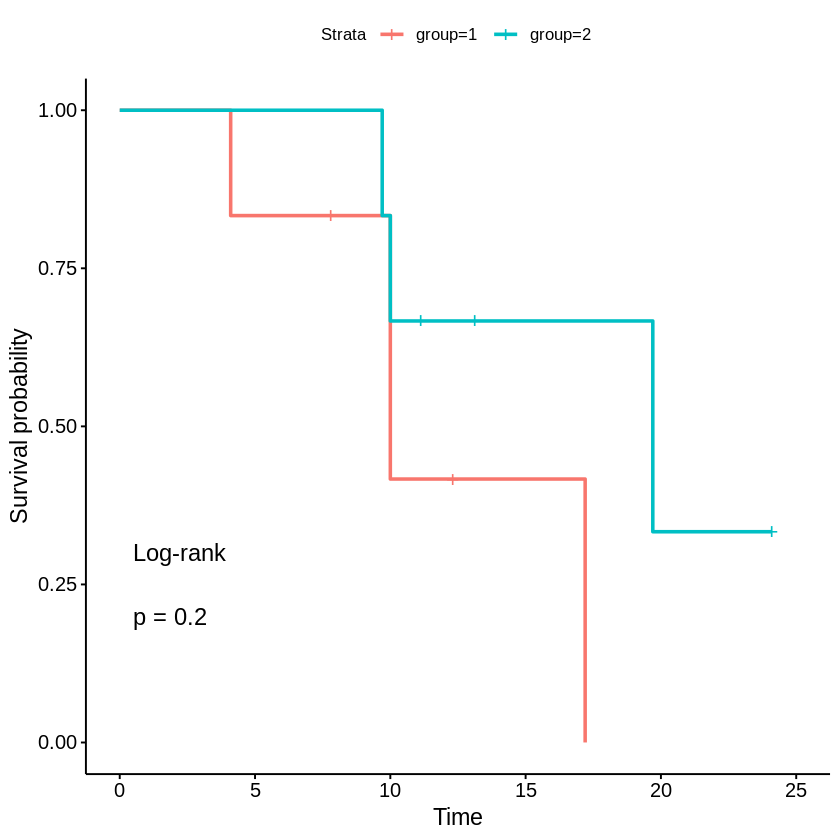

In [21]:
survminer::ggsurvplot(fit,
           pval = TRUE,
           pval.method = TRUE)

In [22]:
# on our lung dataset
survdiff(Surv(time, status) ~ sex, data = lung)

Call:
survdiff(formula = Surv(time, status) ~ sex, data = lung)

        N Observed Expected (O-E)^2/E (O-E)^2/V
sex=1 138      112     91.6      4.55      10.3
sex=2  90       53     73.4      5.68      10.3

 Chisq= 10.3  on 1 degrees of freedom, p= 0.001 

In [23]:
fit_df <- survfit(Surv(time, status) ~ sex, data = df)

Warning message in pchisq(chi, df, lower.tail = FALSE):
“NaNs produced”


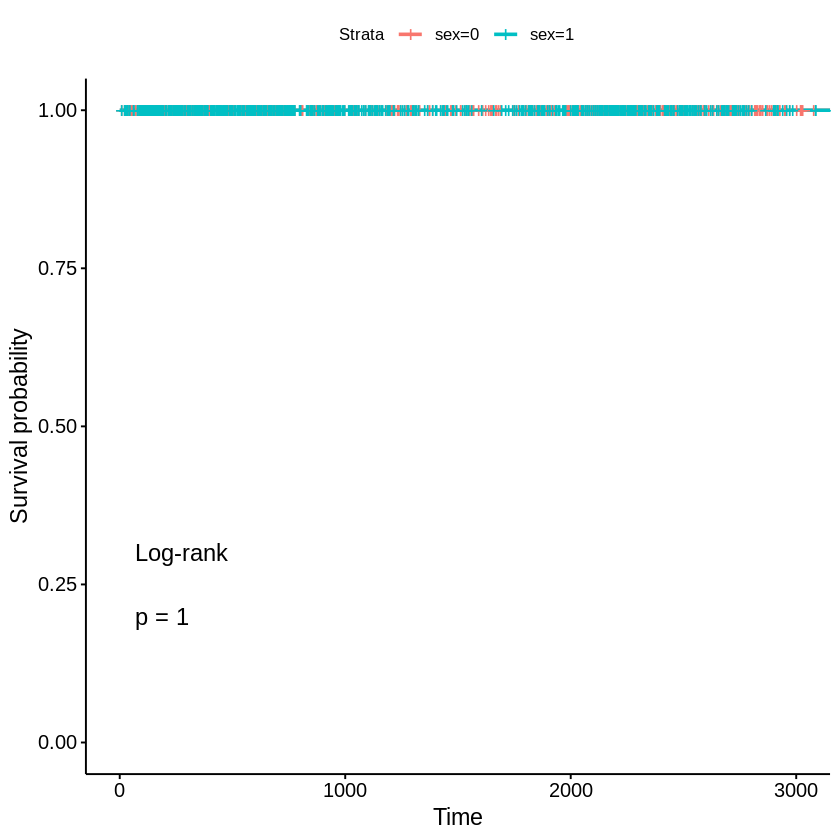

In [24]:
survminer::ggsurvplot(fit_df,
           pval = TRUE,
           pval.method = TRUE)

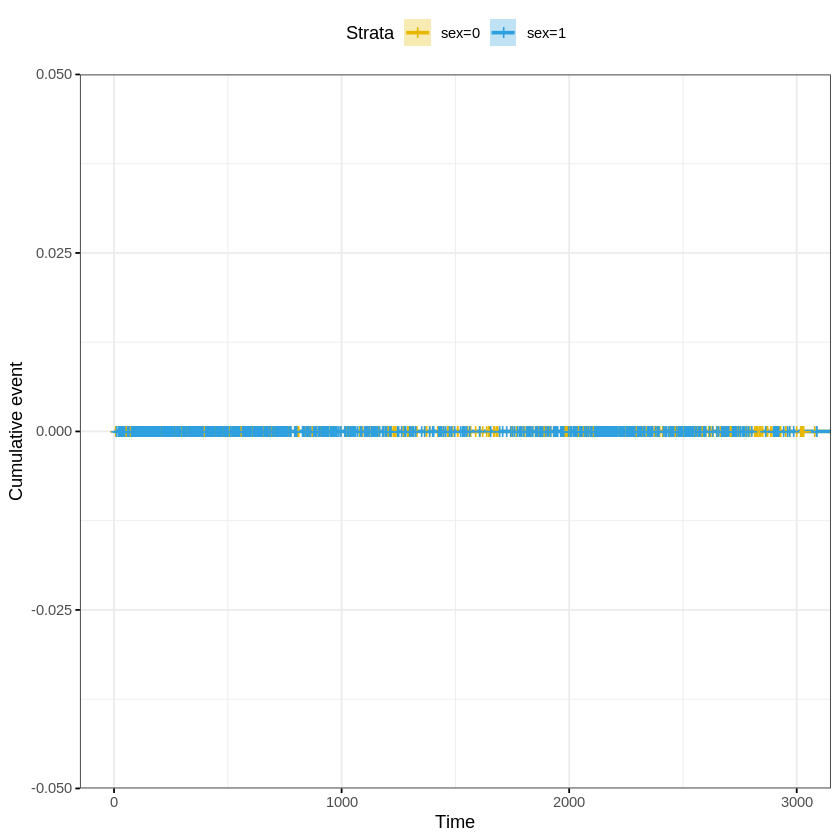

In [25]:
# plot cumulative events
survminer::ggsurvplot(fit_df,
                      conf.int = TRUE,
                      risk.table.col = "strata", # Change risk table color by groups
                      ggtheme = theme_bw(), # Change ggplot2 theme
                      palette = c("#E7B800", "#2E9FDF"),
                      fun = "event")

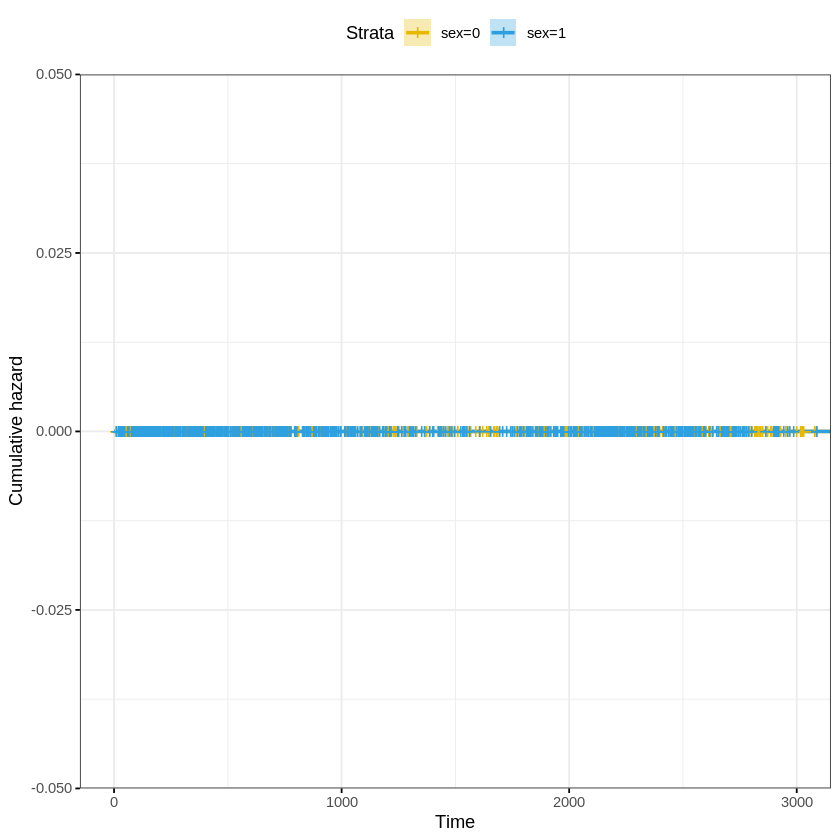

In [27]:
# and cumulative hazard
survminer::ggsurvplot(fit_df,
           conf.int = TRUE,
           risk.table.col = "strata", # Change risk table color by groups
           ggtheme = theme_bw(), # Change ggplot2 theme
           palette = c("#E7B800", "#2E9FDF"),
           fun = "cumhaz")

In [28]:
library(KMsurv)

In [29]:
# load data
data(burn)

In [30]:
# preview data
head(burn)

,Obs,Z1,Z2,Z3,Z4,Z5,Z6,Z7,Z8,Z9,Z10,Z11,T1,D1,T2,D2,T3,D3
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,0,0,0,15,0,0,1,1,0,0,2,12,0,12,0,12,0
2,2,0,0,1,20,0,0,1,0,0,0,4,9,0,9,0,9,0
3,3,0,0,1,15,0,0,0,1,1,0,2,13,0,13,0,7,1
4,4,0,0,0,20,1,0,1,0,0,0,2,11,1,29,0,29,0
5,5,0,0,1,70,1,1,1,1,0,0,2,28,1,31,0,4,1
6,6,0,0,1,20,1,0,1,0,0,0,4,11,0,11,0,8,1


In [31]:
# fit
fit <- survfit(Surv(T3, D3) ~ Z1, data = burn)

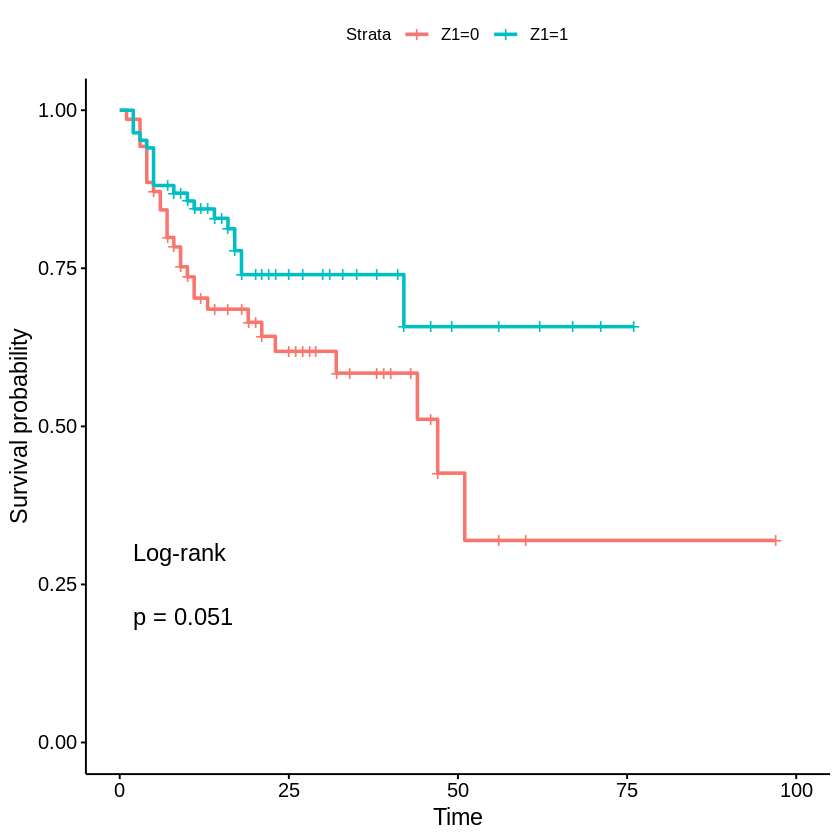

In [32]:
# plot with log-rank test
survminer::ggsurvplot(fit,
           pval = TRUE,
           pval.method = TRUE)